'c:\\Users\\joeli\\OneDrive\\Documents\\GitHub\\mediapipe-facemesh'

In [3]:
import matplotlib.pyplot as plt
import os
import json
import cv2
import numpy as np
import mediapipe as mp
import skimage
from skimage.transform import PiecewiseAffineTransform, warp
import cv2
import mediapipe as mp
import skimage
from skimage.transform import PiecewiseAffineTransform, warp
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
import mediapipe as mp
from mediapipe.python.solutions import drawing_utils as mp_drawing
from mediapipe.python.solutions import face_mesh as mp_face_mesh

import imgaug.augmenters as iaa
import random
import re
import os
import shutil

objc[98973]: Class CaptureDelegate is implemented in both /Users/joeljohnson/opt/anaconda3/envs/mediapipe/lib/python3.9/site-packages/cv2/cv2.abi3.so (0x161672520) and /Users/joeljohnson/opt/anaconda3/envs/mediapipe/lib/python3.9/site-packages/mediapipe/.dylibs/libopencv_videoio.3.4.16.dylib (0x12f144860). One of the two will be used. Which one is undefined.
objc[98973]: Class CVWindow is implemented in both /Users/joeljohnson/opt/anaconda3/envs/mediapipe/lib/python3.9/site-packages/cv2/cv2.abi3.so (0x161672570) and /Users/joeljohnson/opt/anaconda3/envs/mediapipe/lib/python3.9/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x11efeca68). One of the two will be used. Which one is undefined.
objc[98973]: Class CVView is implemented in both /Users/joeljohnson/opt/anaconda3/envs/mediapipe/lib/python3.9/site-packages/cv2/cv2.abi3.so (0x161672598) and /Users/joeljohnson/opt/anaconda3/envs/mediapipe/lib/python3.9/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (

In [42]:
# Specify the additional string to be added to the file names
neutral_path = r"meta46/neutral/FaceColor_MAIN.PNG"
aged_path = r"meta46/old/FaceColor_MAIN.PNG"

# extra_string = 'mask_blush_m'
# directory = r"C:\Users\joeli\Dropbox\AE_InputModels\masks\blush"
# # Loop through each file in the directory
# # Loop through each file in the directory
# for filename in os.listdir(directory):
#     # Check if the file is a regular file
#     if os.path.isfile(os.path.join(directory, filename)):
#         # Remove all non-numeric characters from the file name
#         numeric_filename = re.sub('[^0-9]', '', filename)
        
#         # Construct the new file name with the extra string at the start
#         new_filename = extra_string + numeric_filename + '.png'
        
#         # Construct the old and new file paths
#         old_path = os.path.join(directory, filename)
#         new_path = os.path.join(directory, new_filename)
        
#         # Rename the file
#         os.rename(old_path, new_path)
        
#         print(f"Renamed '{filename}' to '{new_filename}'")

In [43]:


# Specify the source directory
source_dir = r"masks"

# Specify the destination directory
destination_dir = r"masks"

# Loop through each directory and file in the source directory
for root, dirs, files in os.walk(source_dir):
    for filename in files:
        # Check if the file contains "60" in its name
        if "60" in filename:
            # Construct the source and destination paths
            source_path = os.path.join(root, filename)
            destination_path = os.path.join(destination_dir, filename)
            
            # Create the destination directory if it doesn't exist
            os.makedirs(destination_dir, exist_ok=True)
            
            # Copy the file to the destination directory
            shutil.copy2(source_path, destination_path)
            
            print(f"Copied '{filename}' to '{destination_dir}'")

In [4]:

LIPS = frozenset([
    # Lips.
    (61, 146),
    (146, 91),
    (91, 181),
    (181, 84),
    (84, 17),
    (17, 314),
    (314, 405),
    (405, 321),
    (321, 375),
    (375, 291),
    (61, 185),
    (185, 40),
    (40, 39),
    (39, 37),
    (37, 0),
    (0, 267),
    (267, 269),
    (269, 270),
    (270, 409),
    (409, 291),
    (78, 95),
    (95, 88),
    (88, 178),
    (178, 87),
    (87, 14),
    (14, 317),
    (317, 402),
    (402, 318),
    (318, 324),
    (324, 308),
    (78, 191),
    (191, 80),
    (80, 81),
    (81, 82),
    (82, 13),
    (13, 312),
    (312, 311),
    (311, 310),
    (310, 415),
    (415, 308)])
LEFT_EYE = frozenset([
    # Left eye.
    (263, 249),
    (249, 390),
    (390, 373),
    (373, 374),
    (374, 380),
    (380, 381),
    (381, 382),
    (382, 362),
    (263, 466),
    (466, 388),
    (388, 387),
    (387, 386),
    (386, 385),
    (385, 384),
    (384, 398),
    (398, 362) ])
LEFT_EYEBROW = frozenset([
    # Left eyebrow.
    (276, 283),
    (283, 282),
    (282, 295),
    (295, 285),
    (300, 293),
    (293, 334),
    (334, 296),
    (296, 336) ])
RIGHT_EYE = frozenset([
    # Right eye.
    (33, 7),
    (7, 163),
    (163, 144),
    (144, 145),
    (145, 153),
    (153, 154),
    (154, 155),
    (155, 133),
    (33, 246),
    (246, 161),
    (161, 160),
    (160, 159),
    (159, 158),
    (158, 157),
    (157, 173),
    (173, 133) ])
RIGHT_EYEBROW = frozenset([
    # Right eyebrow.
    (46, 53),
    (53, 52),
    (52, 65),
    (65, 55),
    (70, 63),
    (63, 105),
    (105, 66),
    (66, 107) ])
FACE_OVAL = frozenset([
    # Face oval.
    (10, 338),
    (338, 297),
    (297, 332),
    (332, 284),
    (284, 251),
    (251, 389),
    (389, 356),
    (356, 454),
    (454, 323),
    (323, 361),
    (361, 288),
    (288, 397),
    (397, 365),
    (365, 379),
    (379, 378),
    (378, 400),
    (400, 377),
    (377, 152),
    (152, 148),
    (148, 176),
    (176, 149),
    (149, 150),
    (150, 136),
    (136, 172),
    (172, 58),
    (58, 132),
    (132, 93),
    (93, 234),
    (234, 127),
    (127, 162),
    (162, 21),
    (21, 54),
    (54, 103),
    (103, 67),
    (67, 109),
    (109, 10)
])
# ln: 97,75,79,237,242,97
LEFT_NOSE = frozenset([
    # Left nose.
    (97,75),
    (75,79),
    (79,237),
    (237,242),
    (242,97)
])

# rn:328,376,354,274,305,328
RIGHT_NOSE = frozenset([

    (328,354),
    (354,274),
    (274,305),
    (305,289),
    (289,328)
])

UPPER_LIPS = frozenset([
    (61, 146),
    (146, 91),
    (91, 181),
    (181, 84),
    (84, 17),
    (17, 314),
    (314, 405),
    (405, 321),
    (321, 375),
    (375, 291),
    (61, 185),
    (185, 40),
    (40, 39),
    (39, 37),
    (37, 0),
    (0, 267),
    (267, 269),
    (269, 270),
    (270, 409),
    (409, 291),
])
LOWER_LIPS = frozenset([
    (78, 95),
    (95, 88),
    (88, 178),
    (178, 87),
    (87, 14),
    (14, 317),
    (317, 402),
    (402, 318),
    (318, 324),
    (324, 308),
    (78, 191),
    (191, 80),
    (80, 81),
    (81, 82),
    (82, 13),
    (13, 312),
    (312, 311),
    (311, 310),
    (310, 415),
    (415, 308)
])
NOSE = frozenset([
    #197,98,2,327,197
    #197,48,64,98,97,326,327,294,278
    (197,48),
    (48,64),
    (64,98),
    (98,97),
    (97,326),
    (326,327),
    (327,294),
    (294,278),
    (278,197)
    ])

EYE_BAG_LEFT = frozenset([
    #155,22,23,24,110,25,31,228,229,230,231,155
    (112,22),
    (22,23),
    (23,24),
    (24,110),
    (110,25),
    (25,31),
    (31,228),
    (228,229),
    (229,230),
    (230,231),
    (231,112)
])
EYE_BAG_RIGHT = frozenset([
    #453,253,254,339,255,261,448,449,450,451,453
    (453,253),
    (253,254),
    (254,339),
    (339,255),
    (255,261),
    (261,448),
    (448,449),
    (449,450),
    (450,451),
    (451,453)
])

FRECKLE_MASK = frozenset([
    #6,351,153,452,451,450,449,448,261,340,352,411,427,426,423,358, 19,237,129,203,206,207,187,123,228,229,230,231,233,122,6
    (6,351),
    (351,153),
    (153,452),
    (452,451),
    (451,450),
    (450,449),
    (449,448),
    (448,261),
    (261,340),
    (340,352),
    (352,411),
    (411,427),
    (427,426),
    (426,423),
    (423,358),
    (358, 19),
    (19,237),
    (237,129),
    (129,203),
    (203,206),
    (206,207),
    (207,187),
    (187,123),
    (123,228),
    (228,229),
    (229,230),
    (230,231),
    (231,233),
    (233,122),
    (122,6)

])

#6,451,261,372,345,433,416,434,432,411, 426,423,2,203,212,214,192,213,187,116, 35,228,231, 6 
BLUSH_MASK = frozenset([
    (6,451),
    (451,261),
    (261,372),
    (372,345),
    (345,433),
    (433,416),
    (416,434),
    (434,432),
    (432,426),
    (426,423),
    (423,2),
    (2,203),
    (203,212),
    (212,214),
    (214,192),
    (192,213),
    (213,116),
    (116,35),
    (35,228),
    (228,231),
    (231,6)
])


age_marks1 = frozenset([
    #70,111,123,138, 214,192,187,30,101,47,196,195,351,343,365,349,293,300,340,380,411,416,434,367
    70,111,123,138, 214,192,187,30,101,47,196,195,351,343,365,349,293,300,340,380,411,416,434,367
])


Neutral


libpng warning: iCCP: known incorrect sRGB profile
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


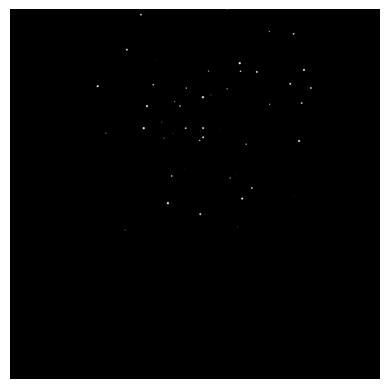

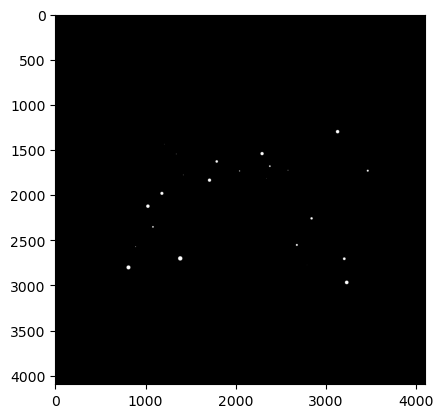

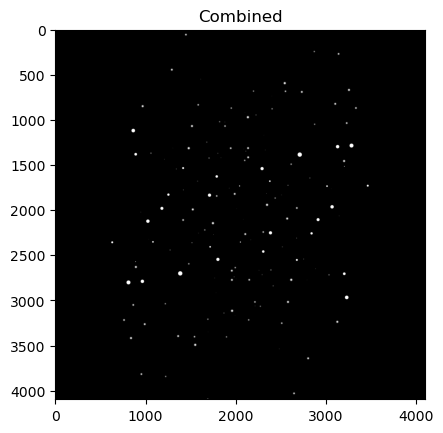

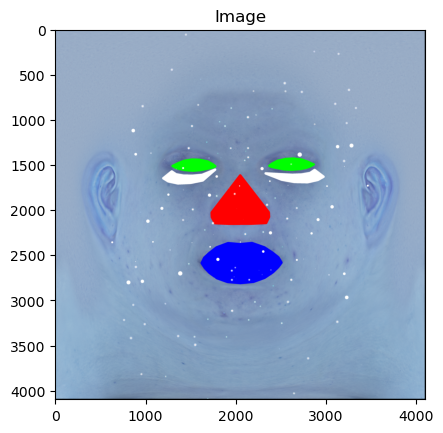

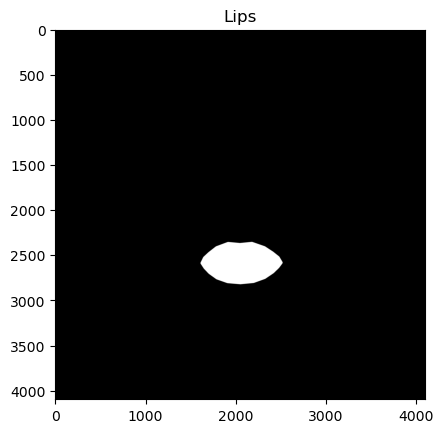

In [5]:
def draw_random_circles(base, color=(255,0,0), thickness=5):
    for i in range(0, 100):
        x = random.randint(0, base.shape[1])
        y = random.randint(0, base.shape[0])
        cv2.circle(base, (x,y), 5, color, thickness)
    return base
def draw_lines(image, face_landmarks, segments, color=(255,0,0), thickness=5):
    points = []
    for i in segments:
        p1 = i[0]
        p2 = i[1]
        p1x = int(face_landmarks.landmark[p1].x * image.shape[1])
        p1y = int(face_landmarks.landmark[p1].y * image.shape[0])
        p2x = int(face_landmarks.landmark[p2].x * image.shape[1])
        p2y = int(face_landmarks.landmark[p2].y * image.shape[0])
        points.append([p1x, p1y])
        points.append([p2x, p2y])
        #flood = fill_contour(image, color, (p1x, p1y))
        #poly line p1 to p2
        cv2.line(image, (p1x, p1y), (p2x, p2y), color, thickness=thickness)
        # cv2.polylines(image, np.array([points]), False, color, thickness=50)

    # Draw lines
    for i in range(0, len(points), 2):
        p1 = points[i]
        p2 = points[i + 1]
        cv2.line(image, p1, p2, color, thickness=25)
    #fill contour
    #seed = last point
    seed = points[-1]
    cv2.floodFill(image, None, seedPoint=(seed[0], seed[1]), newVal=color, loDiff=(0,0,0,0), upDiff=(0,0,0,0), flags=4 | cv2.FLOODFILL_MASK_ONLY)

    center = (sum([p[0] for p in points])//len(points), sum([p[1] for p in points])//len(points))

    return image
def draw_spots(image, face_landmarks, freckle_mask, color=(255,255,255), thickness=5):
    NOSE = set(range(4, 201))
    # Draw contour
    contour_points = []
    idx = 1
    for pair in freckle_mask:
        if idx % 2 == 0:
            continue
        idx += 1
        p1, p2 = pair
        x1, y1 = int(face_landmarks.landmark[p1].x * image.shape[1]), int(face_landmarks.landmark[p1].y * image.shape[0])
        x2, y2 = int(face_landmarks.landmark[p2].x * image.shape[1]), int(face_landmarks.landmark[p2].y * image.shape[0])
        contour_points.append([x1, y1])
        contour_points.append([x2, y2])
    contour_points = np.array(contour_points)

    # Draw spots on the landmarks
    for id, lm in enumerate(face_landmarks.landmark):
        shift = random.randint(-275, 275)
        shift_y = random.randint(0, 125)

        if id in UPPER_LIPS or id in LOWER_LIPS or id in LEFT_EYE or id in RIGHT_EYE:
            continue
        ih, iw, _ = image.shape
        x, y = int(lm.x * iw), int(lm.y * ih)
        #move x left or right
        y -= 750
        size = random.randint(1, 12)
        # 80% of spots inside contour, 20% outside
        if cv2.pointPolygonTest(contour_points, (x, y), False) >= 0 or random.random() < 0.1:
            if id in NOSE or id in LEFT_EYE or id in RIGHT_EYE:
                y += shift_y
                x += shift
            cv2.circle(image, (x, y), size, color, -1)  # -1 thickness makes circle filled

    return image


def draw_blemishes(image, face_landmarks, blemish_landmarks, color=(255,255,255), thickness=5):
    
    for id in blemish_landmarks:
        ih, iw, _ = image.shape
        lm = face_landmarks.landmark[id]
        x, y = int(lm.x * iw), int(lm.y * ih)
        x += random.randint(-400, 400)
        y += random.randint(-25, 25)
        y += random.randint(0, 125)

        size = random.randint(1, 24)  # random size for the blemish
        cv2.circle(image, (x, y), size, color, -1)  # -1 thickness makes circle filled

    return image

mask_directory = r"images"
color_dict = {
    'lips': (255, 0, 0),
    'eyes': (0, 255, 0),
    'nose': (0, 0, 255),
    'bags': (255,255,255)
}

neutral_path = r"images/models_4k/m141_4k.png"
aged_path = r"images/models_4k/m141_4k.png"
image_path = neutral_path 
title = "Neutral"
print(title)

# Load the image
# image_path = os.path.join(r"C:\\Users\\joeli\\Dropbox\\AE_InputModels\\", image_filename)
image = cv2.imread(image_path)
blush_mask = np.zeros_like(image)
#convert to RGB image
blush_mask = np.zeros_like(image, dtype=np.uint8)
age_hemoglobin = np.zeros_like(image)
age_thickness = np.zeros_like(image)
# Flip the image horizontally for a later selfie-view display, and convert
# the BGR image to RGB.
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
annotated_image = image.copy()
ica_annnotated_image = image.copy()
mask = np.zeros(image.shape, dtype=np.uint8)
# Process the image with MediaPipe Face Mesh
with mp.solutions.face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    min_detection_confidence=0.5) as face_mesh:

    results = face_mesh.process(image)

    face_landmarks = results.multi_face_landmarks[0]

    # Draw and fill lips
    image= draw_lines(image, face_landmarks, LIPS, color=color_dict['lips'])
    image = draw_lines(image, face_landmarks, LEFT_EYE, color=color_dict['eyes'])
    image = draw_lines(image, face_landmarks, RIGHT_EYE, color=color_dict['eyes'])
    image = draw_lines(image, face_landmarks, NOSE, color=color_dict['nose'])
    image = draw_lines(image, face_landmarks, EYE_BAG_LEFT, color=color_dict['bags'])
    image = draw_lines(image, face_landmarks, EYE_BAG_RIGHT, color=color_dict['bags'])
    

    mask = draw_lines(mask, face_landmarks, LIPS, color=color_dict['lips'])
    mask = draw_lines(mask, face_landmarks, LEFT_EYE, color=color_dict['eyes'])
    mask = draw_lines(mask, face_landmarks, RIGHT_EYE, color=color_dict['eyes'])
    mask = draw_lines(mask, face_landmarks, NOSE, color=color_dict['nose'])
    mask = draw_lines(mask, face_landmarks, EYE_BAG_LEFT, color=color_dict['bags'])
    mask = draw_lines(mask, face_landmarks, EYE_BAG_RIGHT, color=color_dict['bags'])
    # Create color masks
    red_mask = cv2.inRange(image, (255, 0, 0), (255, 0, 0))
    green_mask = cv2.inRange(image, (0, 255, 0), (0, 255, 0))
    blue_mask = cv2.inRange(image, (0, 0, 255), (0, 0, 255))
    white_mask = cv2.inRange(image, (255, 255, 255), (255, 255, 255))

    # Find the contours in the masks
    red_contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    green_contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    blue_contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    white_contours, _ = cv2.findContours(white_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Fill the contours with respective colors
    for contour in red_contours:
        cv2.drawContours(image, [contour], 0, (255, 0, 0), -1)
        cv2.drawContours(mask, [contour], 0, (255, 0, 0), -1)

    for contour in green_contours:
        cv2.drawContours(image, [contour], 0, (0, 255, 0), -1)
        cv2.drawContours(mask, [contour], 0, (0, 255, 0), -1)

    for contour in blue_contours:
        cv2.drawContours(image, [contour], 0, (0, 0, 255), -1)
        cv2.drawContours(mask, [contour], 0, (0, 0, 255), -1)
    for contour in white_contours:
        cv2.drawContours(image, [contour], 0, (255, 255, 255), -1)
        cv2.drawContours(mask, [contour], 0, (255, 255, 255), -1)
    #gauusian blur mask
    mask = cv2.GaussianBlur(mask, (5,5), cv2.BORDER_DEFAULT)

    mask = cv2.GaussianBlur(mask, (15,15), cv2.BORDER_DEFAULT)
    #huge blur

    spots_mask = np.zeros(image.shape, dtype=np.uint8)
    # spots_mask = draw_spots(spots_mask, face_landmarks, color=(255,255,255  ))  
    # def draw_spots(image, face_landmarks, freckle_mask, color=(255,255,255), thickness=5):
    spots_mask = draw_spots(spots_mask, face_landmarks,FRECKLE_MASK, color=(255,255,255  ))

    # Display the image
    spots_mask = cv2.cvtColor(spots_mask, cv2.COLOR_BGR2RGB)
    plt.imshow(spots_mask)
    # plt.title('Spots')
    #save figure to mask folder bbox tight
    #max gaussian blur
    spots_mask = cv2.GaussianBlur(spots_mask, (15,15), cv2.BORDER_DEFAULT)
    path = r"spot_mask.png"
    cv2.imwrite('spots_mask.png', spots_mask)
    #no axis, no white space
    plt.axis('off')


    plt.show()
    #make blemish mask
    blemish_mask = np.zeros(image.shape, dtype=np.uint8)
    blemish_mask = draw_blemishes(blemish_mask, face_landmarks, age_marks1,color=(255,255,255), thickness=5)
    blemish_mask = cv2.cvtColor(blemish_mask, cv2.COLOR_BGR2RGB)
    plt.imshow(blemish_mask)
    cv2.imwrite('blemish_mask.png', blemish_mask)
    plt.show()
    #combine masks
    combined_mask = cv2.bitwise_or(blemish_mask, spots_mask)
    #mirror mask and rotate by 45
    # combined_mask = cv2.bitwise_or(combined_mask, cv2.flip(combined_mask, 1))
    combined_mask = cv2.bitwise_or(combined_mask, cv2.rotate(combined_mask, cv2.ROTATE_180))
    #gaussian blur
    # combined_mask = cv2.GaussianBlur(combined_mask, (15,15), cv2.BORDER_DEFAULT)
    plt.imshow(combined_mask)
    cv2.imwrite('combined_mask.png', combined_mask)
    plt.title('Combined')
    plt.show()

    #show mask on image
    image = cv2.bitwise_or(image, combined_mask)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title('Image')
    plt.show()
    #save lips mask as just lips in black and white
    lips = np.zeros(image.shape, dtype=np.uint8)
    lips = draw_lines(lips, face_landmarks, LIPS, color=(255,255,255))
    lips = cv2.cvtColor(lips, cv2.COLOR_BGR2RGB)
    white_mask = cv2.inRange(lips, (255, 255, 255), (255, 255, 255))
    white_contours, _ = cv2.findContours(white_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in white_contours:
        cv2.drawContours(lips, [contour], 0, (255, 255, 255), -1)
    # lips = cv2.GaussianBlur(lips, (15,15), cv2.BORDER_DEFAULT)
    plt.imshow(lips)
    plt.title('Lips')
    plt.show()
    cv2.imwrite('lips_mask.png', lips)
    
    #load 

        




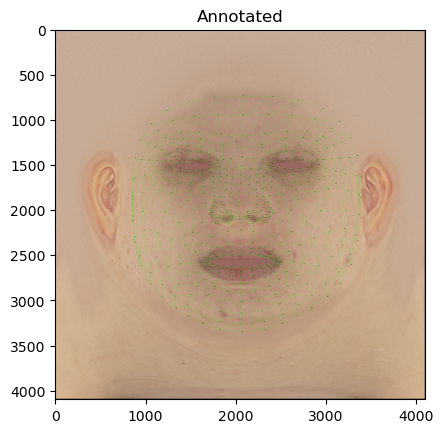

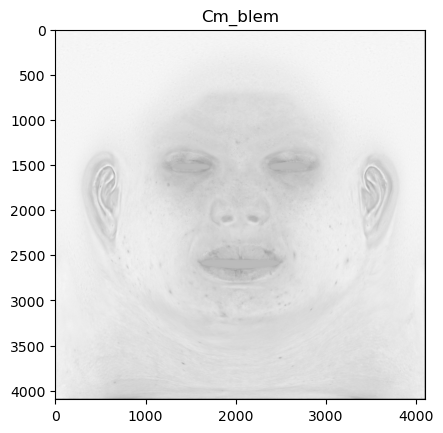

In [14]:
Cm_path = r"images/m141_Cm.png"

Ch_path = r"images/m141_Ch.png"
#load Cm and Ch as binary images
Cm = cv2.imread(Cm_path).astype(np.uint8)
Ch = cv2.imread(Ch_path).astype(np.uint8)

Cm_blem = Cm.copy()
#create function to generate gaussian
def gaussian(im, size, cx, cy, sigma, intensity):
    # Create an empty image
    # image = np.zeros(size)

    # Center of the blemish
    # cx, cy = size[0] // 2, size[1] // 2

    # Create the blemish
    for x in range(size[0]):
        for y in range(size[1]):
            dist = np.sqrt((x - cx)**2 + (y - cy)**2)
            im[x, y] += intensity * np.exp(-(dist**2) / (2 * sigma**2))
    return im

for face_landmarks in results.multi_face_landmarks:
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks,
        connections=mp_face_mesh.FACEMESH_TESSELATION,  # or FACEMESH_CONTOURS or FACEMESH_IRISES
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1),
    )

    # Annotate each landmark with its number
    index = 0
    for id, lm in enumerate(face_landmarks.landmark):
        ih, iw, _ = image.shape
        x, y = int(lm.x * iw), int(lm.y * ih)
        # cv2.putText(annotated_image, str(id), (x, y), cv2.FONT_HERSHEY_SIMPLEX, .75, (0, 255, 0), 1)
        cv2.putText(annotated_image, str(id), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 0), 1)
        #add to ica image
        cv2.putText(ica_annnotated_image, str(id), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)
        #draw gaussian on 3 random points of Cm and Ch
        if index == 25 or index == 50 or index == 75:
            Cm_blem = gaussian(Cm, (1000, 1000), x,y, 10,1)
           
            
        

plt.imshow(annotated_image)
plt.title('Annotated')
plt.show()
#convert to rgb

#save annotated image as high res png in rgb

# cv2.imwrite('annotated_image.png', annotated_image)
#save ica annotated image as high res png
cv2.imwrite('ica_annnotated_image.png', ica_annnotated_image)
plt.imshow(Cm_blem)
plt.title('Cm_blem')
plt.show()

/Users/joeljohnson/opt/anaconda3/envs/mediapipe/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:729: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  self._fit_transform(X, compute_sources=False)


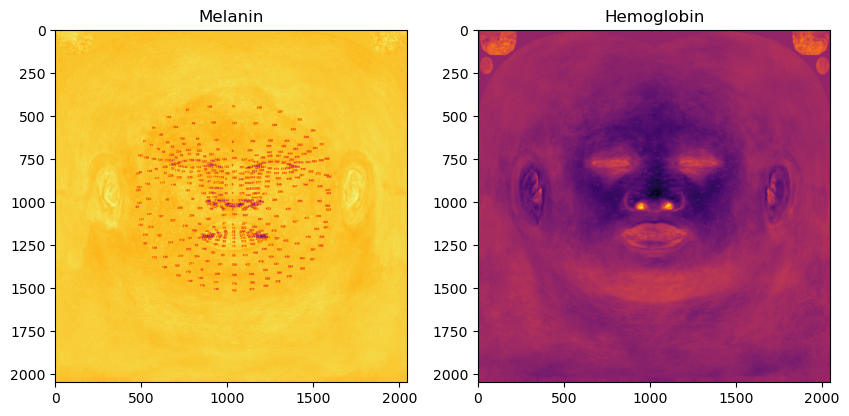

In [18]:
import cv2
import numpy as np
from sklearn.decomposition import FastICA

image = ica_annnotated_image
# Convert the image from BGR to YCrCb color space
ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

# Flatten the image into a 2D array
data = ycrcb.reshape(-1, 3)

# Initialize the ICA model
ica = FastICA(n_components=2,max_iter=100000, tol=0.000001, random_state=0, algorithm='parallel', whiten=True, fun='cube', fun_args=None)

# Fit the ICA model to the data
ica.fit(data)

# Get the independent components
components = ica.transform(data)
melanin_component = components[:, 0]
# Extract the melanin and hemoglobin components
hemoglobin_component = components[:, 1]

# Reshape the hemoglobin component back into the original image shape
hemoglobin_component = hemoglobin_component.reshape(*ycrcb.shape[:2])
melanin_component = melanin_component.reshape(*ycrcb.shape[:2])

# Normalize the hemoglobin component for display
normalized_hemoglobin = cv2.normalize(hemoglobin_component, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(melanin_component, cmap="inferno_r")
ax[0].set_title("Melanin")
ax[1].imshow(hemoglobin_component, cmap="inferno_r")
ax[1].set_title("Hemoglobin")
#add landmarks  to both images
plt.show()

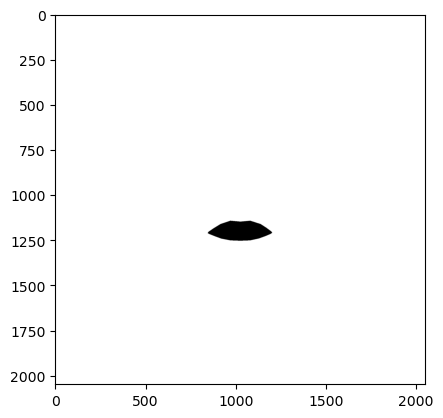

In [20]:
# mp_drawing = mp.solutions.drawing_utils
# mp_face_mesh = mp.solutions.face_mesh
# drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

def draw_lines(image, face_landmarks, segments):
    points = []
    segs = []
    for i in segments:
        p1 = i[0]
        p2 = i[1]
        p1x = int(face_landmarks.landmark[p1].x * image.shape[1])
        p1y = int(face_landmarks.landmark[p1].y * image.shape[0])
        p2x = int(face_landmarks.landmark[p2].x * image.shape[1])
        p2y = int(face_landmarks.landmark[p2].y * image.shape[0])
        points.append((p1x, p1y))
        points.append((p2x, p2y))
        segs.append((p1x, p1y))

    # Draw lines
    for i in range(0, len(points), 2):
        p1 = points[i]
        p2 = points[i + 1]
        cv2.line(image, p1, p2, (255,255, 255), thickness=20)
    lips_points = np.array(points).reshape((-1, 1, 2))
    # cv2.floodFill(image, None, (0,0), (255,255, 255))
    # cv2.fillPoly(image, [lips_points], (0,0,0))
    return image
    
def fill_white_circle(m, color = (255,255,255)):

    # mask_ul = draw_lines(mask_ul, face_landmarks, LOWER_LIPS)
    # Fill lips using PIL
    m = Image.fromarray(m)
    # Get white pixel
    m = np.array(m)
    seed_point = np.where(np.all(m == color, axis=-1))
    seed_point = (seed_point[0][0], seed_point[1][0])
    # Fill lips
    cv2.floodFill(m, None, seed_point, color)

    return m

# Load the image
image_path = "images/meta46/neutral/FaceColor_MAIN.PNG"
image = cv2.imread(image_path)

# Flip the image horizontally for a later selfie-view display, and convert
# the BGR image to RGB.
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = Image.open(image_path).convert('RGB')

with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    min_detection_confidence=0.5) as face_mesh:
    
    # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
    results = face_mesh.process(image)

    # Draw face landmarks of the first face (since max_num_faces=1).
    # if results.multi_face_landmarks:
    #     for face_landmarks in results.multi_face_landmarks:
    #         image = draw_landmarks(
    #             image=image,
    #             landmarks=face_landmarks)
    
    # Convert the image back to BGR for display.
    # image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mask = np.zeros(image.shape, dtype=np.uint8)
    face_landmarks = results.multi_face_landmarks[0]

    mask_ul = draw_lines(mask, face_landmarks, UPPER_LIPS)
    mask_ul = fill_white_circle(mask_ul)
    mask_eyes = draw_lines(mask, face_landmarks, LEFT_EYE)
    mask_eyes = fill_white_circle(mask_eyes)
    mask_eyes = draw_lines(mask, face_landmarks, RIGHT_EYE)
    mask_eyes = fill_white_circle(mask_eyes)
    mask_nose = draw_lines(mask, face_landmarks, LEFT_NOSE)
    mask_nose = draw_lines(mask, face_landmarks, RIGHT_NOSE)
    mask_nose = fill_white_circle(mask_nose)
    
    #concatenate masks
    mask = mask_ul | mask_eyes | mask_nose
    
    plt.imshow(mask)
    plt.show()
    #gaussian blur
    



In [ ]:
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

def draw_landmarks(image, landmarks):
    mp_drawing.draw_landmarks(
        image=image,
        landmark_list=landmarks,
        connections=mp_face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=drawing_spec,
        connection_drawing_spec=drawing_spec)

# For webcam input:
cap = cv2.VideoCapture(0)
with mp_face_mesh.FaceMesh(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as face_mesh:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            continue

        # Flip the image horizontally for a later selfie-view display, and convert
        # the BGR image to RGB.
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        results = face_mesh.process(image)

        # Draw the face mesh annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                draw_landmarks(
                    image=image,
                    landmarks=face_landmarks)

        cv2.imshow('MediaPipe FaceMesh', image)
        if cv2.waitKey(5) & 0xFF == 27:
            break
cap.release()

KeyboardInterrupt: 

: 

In [21]:
img_path2 = "images/meta46/neutral/FaceColor_MAIN.PNG"
img_ori = skimage.io.imread(img_path2)

mp_selfie_segmentation = mp.solutions.selfie_segmentation
selfie_segmentation = mp_selfie_segmentation.SelfieSegmentation(model_selection=1)

RGB = cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB)
# get the result
results = selfie_segmentation.process(RGB)
# extract segmented mask
mask = results.segmentation_mask
# apply mask to the original image
mask = np.stack((mask,)*3, axis=-1)
mask = mask * 255
mask = mask.astype(np.uint8)
# apply mask to the original image
masked_image = cv2.bitwise_and(img_ori, mask)
# save the result
plt.imshow(masked_image)
plt.show()

error: OpenCV(4.7.0) /Users/opencv-cn/GHA-OCV-3/_work/opencv-python/opencv-python/opencv/modules/core/src/arithm.cpp:214: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'binary_op'


In [ ]:
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(img)
    return ax

uv_path = "./data/uv_map.json" #taken from https://github.com/spite/FaceMeshFaceGeometry/blob/353ee557bec1c8b55a5e46daf785b57df819812c/js/geometry.js
uv_map_dict = json.load(open(uv_path))
uv_map = np.array([ (uv_map_dict["u"][str(i)],uv_map_dict["v"][str(i)]) for i in range(468)])

In [ ]:
# borrowed from https://github.com/YadiraF/DECA/blob/f84855abf9f6956fb79f3588258621b363fa282c/decalib/utils/util.py
def load_obj(obj_filename):
    """ Ref: https://github.com/facebookresearch/pytorch3d/blob/25c065e9dafa90163e7cec873dbb324a637c68b7/pytorch3d/io/obj_io.py
    Load a mesh from a file-like object.
    """
    with open(obj_filename, 'r') as f:
        lines = [line.strip() for line in f]

    verts, uvcoords = [], []
    faces, uv_faces = [], []
    # startswith expects each line to be a string. If the file is read in as
    # bytes then first decode to strings.
    if lines and isinstance(lines[0], bytes):
        lines = [el.decode("utf-8") for el in lines]

    for line in lines:
        tokens = line.strip().split()
        if line.startswith("v "):  # Line is a vertex.
            vert = [float(x) for x in tokens[1:4]]
            if len(vert) != 3:
                msg = "Vertex %s does not have 3 values. Line: %s"
                raise ValueError(msg % (str(vert), str(line)))
            verts.append(vert)
        elif line.startswith("vt "):  # Line is a texture.
            tx = [float(x) for x in tokens[1:3]]
            if len(tx) != 2:
                raise ValueError(
                    "Texture %s does not have 2 values. Line: %s" % (str(tx), str(line))
                )
            uvcoords.append(tx)
        elif line.startswith("f "):  # Line is a face.
            # Update face properties info.
            face = tokens[1:]
            face_list = [f.split("/") for f in face]
            for vert_props in face_list:
                # Vertex index.
                faces.append(int(vert_props[0]))
                if len(vert_props) > 1:
                    if vert_props[1] != "":
                        # Texture index is present e.g. f 4/1/1.
                        uv_faces.append(int(vert_props[1]))

    verts = np.array(verts)
    uvcoords = np.array(uvcoords)
    faces = np.array(faces); faces = faces.reshape(-1, 3) - 1
    uv_faces = np.array(uv_faces); uv_faces = uv_faces.reshape(-1, 3) - 1
    
    return (
        verts,
        uvcoords,
        faces,
        uv_faces
    )

# borrowed from https://github.com/YadiraF/DECA/blob/f84855abf9f6956fb79f3588258621b363fa282c/decalib/utils/util.py
def write_obj(obj_name,
              vertices,
              faces,
              texture_name = "texture.jpg",
              colors=None,
              texture=None,
              uvcoords=None,
              uvfaces=None,
              inverse_face_order=False,
              normal_map=True,
              ):
    ''' Save 3D face model with texture. 
    Ref: https://github.com/patrikhuber/eos/blob/bd00155ebae4b1a13b08bf5a991694d682abbada/include/eos/core/Mesh.hpp
    Args:
        obj_name: str
        vertices: shape = (nver, 3)
        colors: shape = (nver, 3)
        faces: shape = (ntri, 3)
        texture: shape = (uv_size, uv_size, 3)
        uvcoords: shape = (nver, 2) max value<=1
    '''
    if os.path.splitext(obj_name)[-1] != '.obj':
        obj_name = obj_name + '.obj'
    mtl_name = obj_name.replace('.obj', '.mtl')
    texture_name
    material_name = 'FaceTexture'

    faces = faces.copy()
    # mesh lab start with 1, python/c++ start from 0
    faces += 1
    if inverse_face_order:
        faces = faces[:, [2, 1, 0]]
        if uvfaces is not None:
            uvfaces = uvfaces[:, [2, 1, 0]]

    # write obj
    with open(obj_name, 'w') as f:
        # first line: write mtlib(material library)
        # f.write('# %s\n' % os.path.basename(obj_name))
        # f.write('#\n')
        # f.write('\n')
        if texture is not None:
            f.write('mtllib %s\n\n' % os.path.basename(mtl_name))

        # write vertices
        if colors is None:
            for i in range(vertices.shape[0]):
                f.write('v {} {} {}\n'.format(vertices[i, 0], vertices[i, 1], vertices[i, 2]))
        else:
            for i in range(vertices.shape[0]):
                f.write('v {} {} {} {} {} {}\n'.format(vertices[i, 0], vertices[i, 1], vertices[i, 2], colors[i, 0], colors[i, 1], colors[i, 2]))

        # write uv coords
        if texture is None:
            for i in range(faces.shape[0]):
                f.write('f {} {} {}\n'.format(faces[i, 2], faces[i, 1], faces[i, 0]))
        else:
            for i in range(uvcoords.shape[0]):
                f.write('vt {} {}\n'.format(uvcoords[i,0], uvcoords[i,1]))
            f.write('usemtl %s\n' % material_name)
            # write f: ver ind/ uv ind
            uvfaces = uvfaces + 1
            for i in range(faces.shape[0]):
                f.write('f {}/{} {}/{} {}/{}\n'.format(
                    #  faces[i, 2], uvfaces[i, 2],
                    #  faces[i, 1], uvfaces[i, 1],
                    #  faces[i, 0], uvfaces[i, 0]
                    faces[i, 0], uvfaces[i, 0],
                    faces[i, 1], uvfaces[i, 1],
                    faces[i, 2], uvfaces[i, 2]
                )
                )
            # write mtl
            with open(mtl_name, 'w') as f:
                f.write('newmtl %s\n' % material_name)
                s = 'map_Kd {}\n'.format(os.path.basename(texture_name)) # map to image
                f.write(s)

                if normal_map is not None:
                    name, _ = os.path.splitext(obj_name)
                    normal_name = f'{name}_normals.png'
                    f.write(f'disp {normal_name}')
                    # out_normal_map = normal_map / (np.linalg.norm(
                    #     normal_map, axis=-1, keepdims=True) + 1e-9)
                    # out_normal_map = (out_normal_map + 1) * 0.5

                    cv2.imwrite(
                        normal_name,
                        # (out_normal_map * 255).astype(np.uint8)[:, :, ::-1]
                        normal_map
                    )
            skimage.io.imsave(texture_name, texture)

In [ ]:
#image source: https://mydramalist.com/people/461-aragaki-yui
img_path = "./data/gakki.jpg"
img_path2 = "/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh/data/gakki.jpg"
img_ori = skimage.io.imread(img_path2)
plt.imshow(img_ori)

plt.show()

FileNotFoundError: No such file: 'c:\Users\joeljohnson\Desktop\Joel\mediapipe-facemesh\data\gakki.jpg'

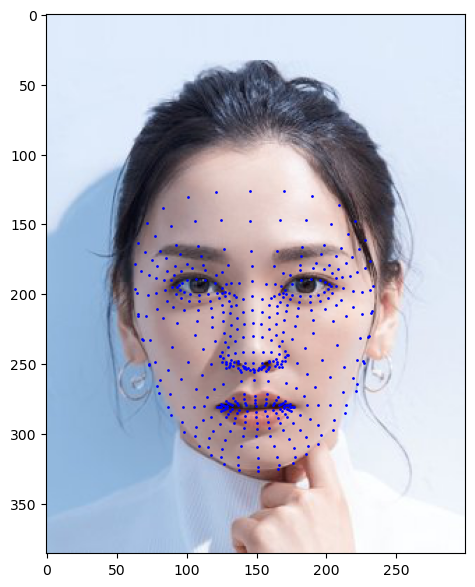

In [ ]:
img = img_ori
# img = masked_image
H,W,_ = img.shape
#run facial landmark detection
with mp.solutions.face_mesh.FaceMesh(
        static_image_mode=True,
        refine_landmarks=True,
        max_num_faces=1,
        min_detection_confidence=0.6) as face_mesh:
        results = face_mesh.process(img)

assert len(results.multi_face_landmarks)==1 

face_landmarks = results.multi_face_landmarks[0]
keypoints = np.array([(W*point.x,H*point.y) for point in face_landmarks.landmark[0:468]])#after 468 is iris or something else
ax = imshow(img)
ax.plot(keypoints[:, 0], keypoints[:, 1], '.b', markersize=2)
# ax.plot(face_landmarks.landmark[100].x*W, face_landmarks.landmark[0].y*H, 'or', markersize=5)
plt.show()

/var/folders/c0/9r1vps757pgfst2gn8pz_ggr0000gn/T/ipykernel_35134/225603380.py:5: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  tform.estimate(keypoints_uv,keypoints)


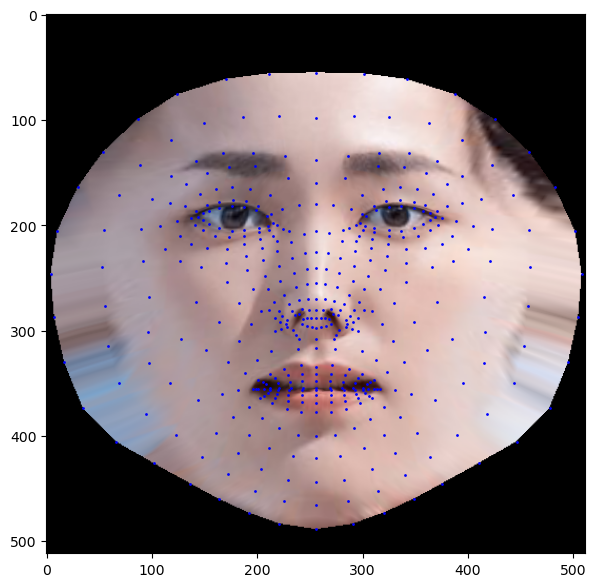

In [ ]:
H_new,W_new = 512,512
keypoints_uv = np.array([(W_new*x, H_new*y) for x,y in uv_map])

tform = PiecewiseAffineTransform()
tform.estimate(keypoints_uv,keypoints)
texture = warp(img_ori, tform, output_shape=(H_new,W_new))
texture = (255*texture).astype(np.uint8)

ax = imshow(texture)
ax.plot(keypoints_uv[:, 0], keypoints_uv[:, 1], '.b', markersize=2)
plt.show()


In [ ]:
keypoints3d = np.array([(point.x,point.y,point.z) for point in face_landmarks.landmark[0:468]])

In [ ]:
obj_filename = "./data/canonical_face_model.obj"
# obj_filename = "/Users/joeljohnson/Desktop/mediapipe-facemesh/data/head_template.obj"
verts,uvcoords,faces,uv_faces = load_obj(obj_filename)

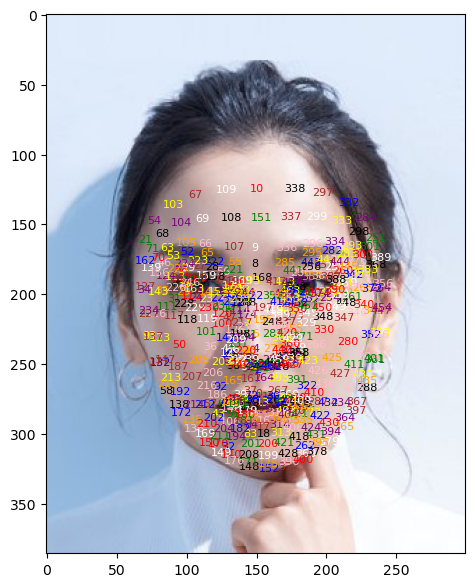

[219 191 187]
[219 191 187]
[172.3 145.7 144.8]
32 [164 140 140] 89.70249439118186
44 [179 145 143] 86.12364657862535
61 [76 48 45] 37.393950045426855
76 [76 48 45] 37.393950045426855
94 [183 140 134] 18.080721777625783
111 [161 135 136] 96.53922777814213
114 [177 146 141] 37.73503014441577
125 [180 145 141] 89.80082126573204
128 [180 147 142] 95.97800529287925
150 [152 126 125] 82.484953173291
182 [161 135 134] 53.89566309082767
189 [140 110 112] 73.0025855706493
201 [175 147 144] 34.32247805738954
202 [174 144 146] 16.51446335791744
218 [177 148 144] 61.75356265026317
220 [168 146 149] 15.326039932090499
227 [159 148 156] 96.3013629187048
247 [148 122 121] 94.7558309551449
296 [177 152 147] 56.834606535103156
373 [176 146 146] 46.53383177861018
380 [177 147 145] 62.466731145466404
381 [174 142 145] 23.540125318272917
442 [181 146 140] 97.57808411728499
447 [241 220 215] 57.00817923771987
454 [240 219 214] 51.876367451854755
[array([168, 146, 149], dtype=uint8), array([174, 144, 146],

/var/folders/c0/9r1vps757pgfst2gn8pz_ggr0000gn/T/ipykernel_35134/56063355.py:51: RuntimeWarning: invalid value encountered in scalar power
  d = sum((2+rm,4,3-rm)*(rgb1-rgb2)**2)**0.5


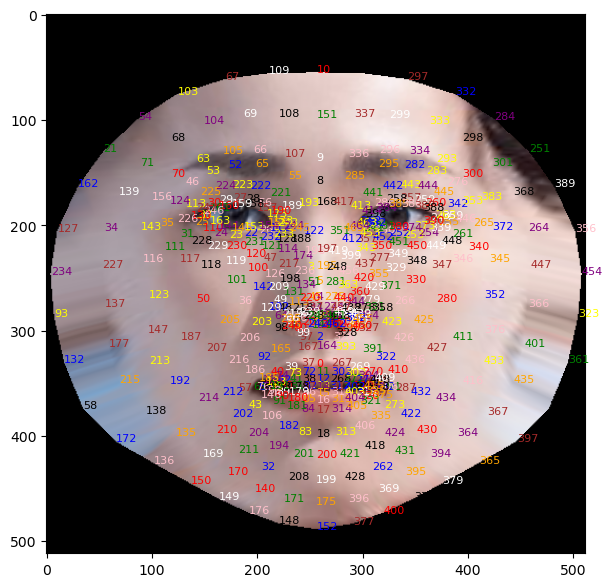

In [ ]:
def normalize_keypoints(keypoints3d):
    center = keypoints3d[0]
    keypoints3d = keypoints3d - center
    axis1 = keypoints3d[165] - keypoints3d[391]
    axis2 = keypoints3d[2] - keypoints3d[0]
    axis3 = np.cross(axis2,axis1)
    axis3 = axis3/np.linalg.norm(axis3)
    axis2 = axis2/np.linalg.norm(axis2)
    axis1 = np.cross(axis3, axis2)
    axis1 = axis1/np.linalg.norm(axis1)
    U = np.array([axis3,axis2,axis1])
    keypoints3d = keypoints3d.dot(U)
    keypoints3d = keypoints3d - keypoints3d.mean(axis=0)
    return keypoints3d

vertices = normalize_keypoints(keypoints3d)

# borrowed from https://github.com/YadiraF/PRNet/blob/master/utils/write.py
obj_name =  "./results/obj_model.obj"
# obj_name2 = "/Users/joeljohnson/Desktop/mediapipe-facemesh/data/head_template.obj"
write_obj(obj_name,
              vertices,
              faces,
              texture_name = "./results/texture3.jpg",
              texture=texture,
              uvcoords=uvcoords,
              uvfaces=uv_faces,
              )

#print landmarks with labels on image
ax = imshow(img_ori)

colors = ['red','green','blue','yellow','purple','orange','pink','brown','black','white']
pixels = {}
tex_pixels = {}
for i in range(len(keypoints)-2):
    c = colors[i%len(colors)]
    pixels[i] = img_ori[int(keypoints[i,1]),int(keypoints[i,0])]
    ax.text(keypoints[i,0], keypoints[i,1], str(i), color=c, fontsize=8)
plt.show()
ax2 = imshow(texture)
for i in range(len(keypoints_uv)-2):
    c = colors[i%len(colors)]
    tex_pixels[i] = texture[int(keypoints_uv[i,1]),int(keypoints_uv[i,0])]
    ax2.text(keypoints_uv[i,0], keypoints_uv[i,1], str(i), color=c,fontsize=8)


def ColorDistance(rgb1,rgb2):
    '''d = {} distance between two colors(3)'''
    rm = 0.5*(rgb1[0]+rgb2[0])
    d = sum((2+rm,4,3-rm)*(rgb1-rgb2)**2)**0.5
    return d
#print average pixel for skin
#show skin pixel at landmark 109
print(img_ori[int(keypoints[109,1]),int(keypoints[109,0])])

print(pixels[109])
#average skin pixel
print(np.mean([pixels[i] for i in range(100,120)],axis=0))
mean  = np.mean([pixels[i] for i in range(100,120)],axis=0)
min = 10000
close_pixels = []
for p in pixels:
    d = ColorDistance(pixels[p],mean)
    if d < 100:
        print(p,pixels[p],d)
        min = d
        close_pixels.append(pixels[p])
#sort by distance
close_pixels = sorted(close_pixels,key=lambda x: ColorDistance(x,mean))

print(close_pixels)
mean  = np.mean(close_pixels[:10],axis=0)
arr = np.empty_like(img_ori)
for i in range(img_ori.shape[0]):
    for j in range(img_ori.shape[1]):
        arr[i,j] = mean
# plt.imshow(arr)
# plt.show()



In [ ]:
#Import Libraries
import cv2
import filetype
import matplotlib.pyplot as plt

import numpy as np
import os
import os,argparse,uuid
import dlib

from imutils import face_utils
import sys
import io 
# caution: path[0] is reserved for script path (or '' in REPL)
# sys.path.insert(1, '/Users/joeljohnson/Desktop/Joel/mediapipe-facemesh')

import webcolors
from sklearn.cluster import KMeans
from collections import Counter 

import config 
#Landmark's facial detector to estimate the location of 68 coordinates that map the facial points
#in a person's face
FACIAL_LANDMARK_PREDICTOR = os.path.join(img_path,'shape_predictor_68_face_landmarks.dat')

# Defining the HSV Thresholds representing the HSV pixel intensities to be considered skin
LOWER_THRESHOLD = np.array([0, 48, 80], dtype=np.uint8)
UPPER_THRESHOLD = np.array([20, 255, 255], dtype=np.uint8)


def initialize_dlib(facial_landmark_predictor:str):
    """
    Initialize dlib's face detetctor (HOG-based) and then create the facial landmark predictor
    """
    print('Loading facial landmark predictor...')
    detector  = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(FACIAL_LANDMARK_PREDICTOR)

    return detector, predictor

"""
def top_image_colors(img,n):
    import pandas as pd
    #Convert the image to RGB
    image = img.convert('RGB')

    detected_colors = []
    for x in range(image.width):
        for y in range(image.height):
            (a,b,c) = image.getpixel((x,y))
            if a != 0 and b!=0 and c!=0:
                detected_colors.append(find_color( (a,b,c) ))
    Series_Colors = pd.Series(detected_colors)
    output = Series_Colors.value_counts()/len(Series_Colors)
    l_colors = output.reset_index().values.tolist()
    top_color_name  = l_colors[0][0]
    top_color_score = round(l_colors[0][1] * 100 ,0)
    return top_color_name, top_color_score
"""
def extract_faces_landmarks(img, detector, predictor):
    # Convert image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the gray scale frame
    faces = detector(img_gray, 0)

    for idx, face in enumerate(faces):
        landmarks = predictor(img_gray, face)
        landmarks_points = []
        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            landmarks_points.append((x, y))
        yield {
                "face": face
                , "landmarks": landmarks_points
        }

def mask_landmark(img,pts):
    # Create a mask
    mask = np.ones(img.shape[:2],np.uint8) #np.zeros(img.shape[:2],np.uint8)
    cv2.drawContours(mask,[pts],-1,(0,0,0),-1,cv2.LINE_AA)
    masked_img = cv2.bitwise_and(img,img,mask=mask)
    return masked_img

def extract_face_skin_area(img,landmarks_points,shape,face_landmarks,face):
    #print('landmarks', landmarks_points)
    #print('shape', shape)
    #print('face_landmarks', face_landmarks)
    #print('face', face)

    # Convert image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_mask = np.zeros_like(img_gray)
    points = np.array(landmarks_points, np.int32)
    convexhull = cv2.convexHull(points)
    head_mask = cv2.fillConvexPoly(face_mask, convexhull, 255)
    masked_img = cv2.bitwise_and(img,img, mask=head_mask)

    for name, (i, j) in (
              face_landmarks[0]  # mouth
            , face_landmarks[1]  # inner_mouth
            , face_landmarks[2]  # right_eyebrow
            , face_landmarks[3]  # left_eyebrow
            , face_landmarks[4]  # right_eye
            , face_landmarks[5]  # left_eye
            ):
        pts = np.array([shape[i:j]])
        masked_img = mask_landmark(masked_img, pts)

    (x, y, w, h) = face_utils.rect_to_bb(face)
    print('x, y, w, h', x, y, w, h)
    x = 0 if x < 0 else x
    y = 0 if y < 0 else y
    masked_face = masked_img[y:y + h, x:x + w]
    return masked_face


def threshold_face_skin_area(img):
    """
    Perform thresholding based on the range of the thresholds specified to extract pixels
    that corresponds to the skin color range.
    Take an 8 bit 3 channel image in BGR colorspace and returns the extracted image in the
    same colorspace.
    """
    # Take a copy of the image
    img = img.copy()

    # Converting from BGR Colors Space to HSV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Single Channel mask,denoting presence of colors in the about threshold
    skinMask = cv2.inRange(img, LOWER_THRESHOLD,UPPER_THRESHOLD)

    # Cleaning up mask using Gaussian Filter
    skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)

    # Extracting skin from the threshold mask
    skin = cv2.bitwise_and(img, img, mask=skinMask)

    # Return the Skin image
    return cv2.cvtColor(skin, cv2.COLOR_HSV2BGR)

def remove_black_areas(estimator_labels, estimator_cluster):
    """
    Remove out the black pixel from skin area extracted
    By default OpenCV does not handle transparent images and replaces those with zeros (black).
    Useful when thresholding is used in the image.
    """
    # Check for black
    hasBlack = False

    # Get the total number of occurence for each color
    occurence_counter = Counter(estimator_labels)

    # Quick lambda function to compare to lists
    compare = lambda x, y: Counter(x) == Counter(y)

    # Loop through the most common occuring color
    for x in occurence_counter.most_common(len(estimator_cluster)):

        # Quick List comprehension to convert each of RBG Numbers to int
        color = [int(i) for i in estimator_cluster[x[0]].tolist()]

        # Check if the color is [0,0,0] that if it is black
        if compare(color, [0, 0, 0]) == True:
            # delete the occurence
            del occurence_counter[x[0]]
            # remove the cluster
            hasBlack = True
            estimator_cluster = np.delete(estimator_cluster, x[0], 0)
            break

    return (occurence_counter, estimator_cluster, hasBlack)


def get_color_information(estimator_labels, estimator_cluster, hasThresholding=False):
    """
    Extract color information based on predictions coming from the clustering.
    Accept as input parameters estimator_labels (prediction labels)
                               estimator_cluster (cluster centroids)
                               has_thresholding (indicate whether a mask was used).
    Return an array the extracted colors.
    """
    # Variable to keep count of the occurence of each color predicted
    occurence_counter = None

    # Output list variable to return
    colorInformation = []

    # Check for Black
    hasBlack = False

    # If a mask has be applied, remove th black
    if hasThresholding == True:

        (occurence, cluster, black) = remove_black_areas(estimator_labels, estimator_cluster)
        occurence_counter = occurence
        estimator_cluster = cluster
        hasBlack = black

    else:
        occurence_counter = Counter(estimator_labels)

    # Get the total sum of all the predicted occurences
    totalOccurence = sum(occurence_counter.values())

    # Loop through all the predicted colors
    for x in occurence_counter.most_common(len(estimator_cluster)):
        index = (int(x[0]))

        # Quick fix for index out of bound when there is no threshold
        index = (index - 1) if ((hasThresholding & hasBlack) & (int(index) != 0)) else index

        # Get the color number into a list
        color = estimator_cluster[index].tolist()

        # Get the percentage of each color
        color_percentage = (x[1] / totalOccurence)

        # make the dictionay of the information
        colorInfo = {"cluster_index": index, "color": color, "color_percentage": color_percentage}

        # Add the dictionary to the list
        colorInformation.append(colorInfo)

    return colorInformation


def extract_dominant_colors(image, number_of_colors=5, hasThresholding=False):
    """
    Putting all together.
    Accept as input parameters image -> the input image in BGR format (8 bit / 3 channel)
                                     -> the number of colors to extracted.
                                     -> hasThresholding indicate whether a thresholding mask was used.
    Leverage machine learning by using an unsupervised clustering algorithm (Kmeans Clustering) to cluster the
    image pixels data based on their RGB values.
    """
    # Quick Fix Increase cluster counter to neglect the black(Read Article)
    if hasThresholding == True:
        number_of_colors += 1

    # Taking Copy of the image
    img = image.copy()

    # Convert Image into RGB Colors Space
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Reshape Image
    img = img.reshape((img.shape[0] * img.shape[1]), 3)

    # Initiate KMeans Object
    estimator = KMeans(n_clusters=number_of_colors, random_state=0)

    # Fit the image
    estimator.fit(img)

    # Get Color Information
    colorInformation = get_color_information(estimator.labels_, estimator.cluster_centers_, hasThresholding)
    return colorInformation


def get_top_dominant_color(dominant_colors):
    def find_closest_color(req_color):
        # This is the function which converts an RGB pixel to a color name
        min_colors = {}
        for name, key in webcolors.CSS3_HEX_TO_NAMES.items():
            r_c, g_c, b_c = webcolors.hex_to_rgb(name)
            rd = (r_c - req_color[0]) ** 2
            gd = (g_c - req_color[1]) ** 2
            bd = (b_c - req_color[2]) ** 2
            min_colors[(rd + gd + bd)] = key
            closest_name = min_colors[min(min_colors.keys())]
        return closest_name

    #print(dominant_colors[0].get('cluster_index'))
    #print(dominant_colors[0].get('color'))
    #print(dominant_colors[0].get('color_percentage'))

    color_value = (
                   int(dominant_colors[0].get('color')[2])
                 , int(dominant_colors[0].get('color')[1])
                 , int(dominant_colors[0].get('color')[0])
                  )
    closest_color_name = find_closest_color(
        (
            int(dominant_colors[0].get('color')[0])
           ,int(dominant_colors[0].get('color')[1])
           ,int(dominant_colors[0].get('color')[2])
        )
    )
    color_score = round( dominant_colors[0].get('color_percentage') * 100,2)
    return color_value, closest_color_name, color_score




"""
def prety_print_data(color_info):
  for x in color_info:
    print(pprint.pformat(x))
    print()

def plotColorBar(colorInformation):
    # Create a 500x100 black image
    color_bar = np.zeros((100, 500, 3), dtype="uint8")

    top_x = 0
    for x in colorInformation:
        bottom_x = top_x + (x["color_percentage"] * color_bar.shape[1])

        color = tuple(map(int, (x['color'])))

        cv2.rectangle(color_bar, (int(top_x), 0), (int(bottom_x), color_bar.shape[0]), color, -1)
        top_x = bottom_x
    return color_bar
"""

def detect_skin_color(input_path:str,display_output:bool = False):
    """
    Detect Face Skin Color
    """
    #Initialize dlib face detector using the facial landmark recognition
    detector, predictor = initialize_dlib(facial_landmark_predictor=FACIAL_LANDMARK_PREDICTOR)

    # Read Input Image
    img = cv2.imread(input_path)

    # Preserve a copy of the original
    frame = img.copy()

    # Convert it to gray scale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    output      = []
    output_info = []

    # Loop over the faces detected
    for idx, face_landmarks in enumerate(extract_faces_landmarks(frame, detector, predictor)):
        frame = img.copy()

        face = face_landmarks['face']
        landmark_points = face_landmarks['landmarks']
        #print('landmark_points', landmark_points)

        output_msg = {'msg': "Face {} detected on position (Left:{} Top:{} Right:{} Botton:{}).".\
                                format((idx+1), face.left(), face.top(), face.right(), face.bottom())
                    , 'category': "info"}
        output_info.append(output_msg)
        print(output_msg.get('category'), output_msg.get('msg'))

        #Determine the facial landmarks for the face region
        #Convert the facial landmarks to a Numpy Array
        shape = predictor(gray_frame,face)
        shape = face_utils.shape_to_np(shape)

        # List containing the facial features
        face_landmarks = list(face_utils.FACIAL_LANDMARKS_IDXS.items())

        #Draw the face bounding box
        (x,y,w,h) = face_utils.rect_to_bb(face)
        startX, startY, endX, endY = x, y, (x + w), (y + h)

        #Extract Face Skin Area
        face_skin_area = extract_face_skin_area(frame,landmark_points, shape, face_landmarks,face)

        #Threshold Skin Area
        thresholded_skin = threshold_face_skin_area(face_skin_area)

        dominant_colors = extract_dominant_colors(thresholded_skin,number_of_colors=5,hasThresholding=True)

        color_value, closest_color_name, color_score = get_top_dominant_color(dominant_colors)

        cv2.rectangle(frame, (startX, startY), (endX, endY), color_value, 5)

        label = "{}-{:.2f}%".format(closest_color_name,color_score)
        print(label)
######################
        output_filepath = os.path.join(config.PROCESSED_PATH,
                                           str(uuid.uuid4().hex) + os.path.splitext(input_path)[1])
        cv2.imwrite(output_filepath, frame)
        output_item = {'id': 1, 'folder': config.PROCESSED_FOLDER
                              , 'name': os.path.basename(output_filepath)
                              , 'msg': os.path.basename(output_filepath)}
        output.append(output_item)

        output_filepath = os.path.join(config.PROCESSED_PATH,
                                           str(uuid.uuid4().hex) + os.path.splitext(input_path)[1])
        cv2.imwrite(output_filepath, thresholded_skin)
        output_item = {'id': 2, 'folder': config.PROCESSED_FOLDER
                              , 'name': os.path.basename(output_filepath)
                              , 'msg': label}
        output.append(output_item)
######################

        if display_output:
           # Display Image on screen
           cv2.imshow(label, frame)
           cv2.waitKey(0)

    if display_output:
       # Cleanup
       cv2.destroyAllWindows()

    return output_info , output


def is_valid_path(path):
    """
    Validates the path inputted and makes sure that is a file of type image
    """
    if not path:
        raise ValueError(f"Invalid Path")
    if os.path.isfile(path) and 'image' in filetype.guess(path).mime:
       return path
    else:
       raise ValueError(f"Invalid Path {path}")


def parse_args():
    """
    Get user command line parameters
    """
    parser = argparse.ArgumentParser(description="Available Options")

    parser.add_argument('-i'
                       ,'--input_path'
                       ,dest='input_path'
                       ,type=is_valid_path
                       ,required=True
                       ,help = "Enter the path of the image file to process")

    parser.add_argument('-d'
                        , '--display_output'
                        , dest='display_output'
                        , default=False
                        , type=lambda x: (str(x).lower() in ['true', '1', 'yes'])
                        , help="Display output on screen")

    args = vars(parser.parse_args())

    #To Display The Command Line Arguments
    print("## Command Arguments #################################################")
    print("\n".join("{}:{}".format(i,j) for i,j in args.items()))
    print("######################################################################")

    return args

# if __name__ == '__main__':
#     # Parsing command line arguments entered by user
#     # args = parse_args()
detect_skin_color(input_path  = img_path)



ImportError: dlopen(/Users/joeljohnson/opt/anaconda3/envs/generative38_20230117/lib/python3.8/site-packages/_dlib_pybind11.cpython-38-darwin.so, 0x0002): tried: '/Users/joeljohnson/opt/anaconda3/envs/generative38_20230117/lib/python3.8/site-packages/_dlib_pybind11.cpython-38-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/Users/joeljohnson/opt/anaconda3/envs/generative38_20230117/lib/python3.8/site-packages/_dlib_pybind11.cpython-38-darwin.so' (no such file), '/Users/joeljohnson/opt/anaconda3/envs/generative38_20230117/lib/python3.8/site-packages/_dlib_pybind11.cpython-38-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64'))